Step-1 : Data Pre-Processing Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import pickle
import requests


Load the Dataset

In [3]:
df = pd.read_csv('T1.csv')
df.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


Analyze the datasets


In [4]:
df.rename(columns={
    'Wind Speed (m/s)': 'wind_speed',
    'Wind Direction (°)': 'wind_direction',
    'LV ActivePower (kW)': 'power_output'
}, inplace=True)


In [5]:
if 'Date/Time' in df.columns:
    df.drop(columns=['Date/Time'], inplace=True)

df.fillna(df.mean(), inplace=True)


Understand the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   power_output                   50530 non-null  float64
 1   wind_speed                     50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 3   wind_direction                 50530 non-null  float64
dtypes: float64(4)
memory usage: 1.5 MB


In [7]:
df.describe()

,power_output,wind_speed,Theoretical_Power_Curve (KWh),wind_direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


Handle Missing Values

In [8]:
df.fillna(df.mean(), inplace=True)


Step-2 : Data Visualization
Correlation Heatmap

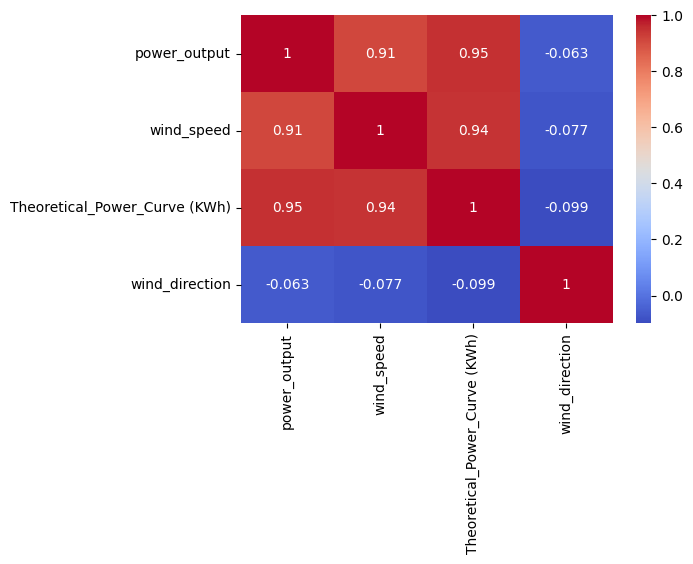

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Split Independent & Dependent Variables

In [10]:
X = df[['wind_speed', 'wind_direction']]
y = df['power_output']


Train–Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Feature Scaling

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train Random Forest Regression Model


In [13]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model Evaluation

In [14]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("RMSE:", rmse)


R2 Score: 0.9000124095290802
RMSE: 413.0496392206637


Save Model & Scaler


In [15]:
pickle.dump(model, open('wind_energy_model.sav', 'wb'))
pickle.dump(scaler, open('scaler.sav', 'wb'))